In [1]:
import numpy as np
import matplotlib.pyplot as plt

class CliffWalking:
    def __init__(self, initial_state, goal_state):
        self.initial_state = initial_state
        self.goal_state = goal_state
        self.state = self.initial_state
        self.reward = 0.0
        self.is_terminal = False

    def is_cliff(self):
        cliff = np.zeros((world_height, world_width), dtype=bool)
        cliff[3, 1: -1] = True
        return cliff[tuple(self.state)]

    # return next_state, reward, done
    def step(self, action):
        i, j = self.state

        if action == up:
            self.state = [max(i - 1, 0), j]
        elif action == left:
            self.state = [i, max(j - 1, 0)]
        elif action == right:
            self.state = [i, min(j + 1, world_width - 1)]
        elif action == down:
            self.state = [min(i + 1, world_height - 1), j]
        else:
            assert False, "Actions should be in the range of (0, 4)"

        if self.is_cliff():
            self.state = self.initial_state
            self.reward = -100.0
            self.is_terminal = False
        elif self.state == self.goal_state:
            self.state = self.state
            self.reward = 0.0
            self.is_terminal = True
        else:
            self.reward = -1.0
            self.is_terminal = False
        return self.state, self.reward, self.is_terminal

    def reset(self):
        self.state = self.initial_state
        self.reward = 0.0
        self.is_terminal = False
        return self.state
    
def is_cliff(self):  
    cliff = np.zeros((world_height, world_width), dtype=np.bool)  
    cliff[3, 1: -1] = True  
    return cliff[tuple(self.state)]

In [2]:
start_position = [3, 0]  
goal = [3, 11]
world_width = 12
world_height = 4 
# actions
right = 0
left = 1
up = 2
down = 3
actions = [right, left, up, down]

def eps_greedy_policy(qsa, epsilon=0.1):
    if np.random.binomial(1, epsilon) == 1:
        return np.random.choice(actions)
    else:
        return np.random.choice([action_ for action_, value_ in enumerate(qsa) if value_ == np.max(qsa)])
    
def double_q(qsa_1, next_qs_2, r, alpha=0.1, gamma=0.1):
        return qsa_1 + alpha*(r + gamma*np.max(next_qs_2) - qsa_1) 

In [3]:
env = CliffWalking(start_position, goal)

runs = 10
episodes = 1000
reward = np.zeros(episodes)

for n in range(runs):
    qsa_1 = np.zeros((world_height, world_width, len(actions)))
    qsa_2 = np.zeros_like(qsa_1)

    for i in range(episodes):
        state = env.reset()
        done=False
        g = 0.0

        while not done:
            row, col = state
            q_aggregated = qsa_1[row, col, :] + qsa_2[row, col, :]
            a = eps_greedy_policy(q_aggregated)
            next_state, r, done = env.step(a)
            g += r
            
            next_row, next_col = next_state
            if np.random.binomial(1,0.5):
                qsa_1[row,col,a] = double_q(qsa_1[row,col,a], qsa_2[next_row,next_col,:], r)
            else:
                qsa_2[row,col,a] = double_q(qsa_2[row,col,a], qsa_1[next_row,next_col,:], r)

            state = next_state

        reward[i] += g   

reward /= runs 

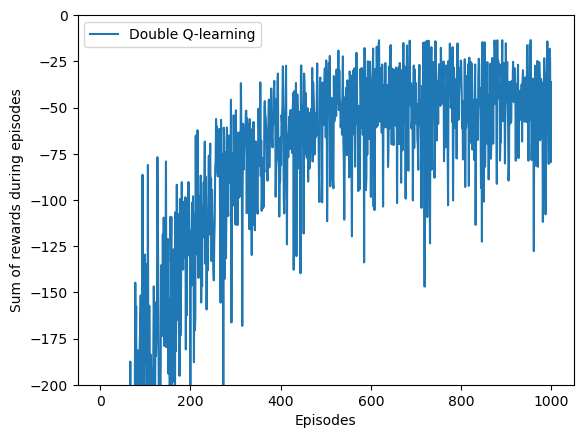

In [4]:
def plot_rewards(plots):
    plt.figure()
    for plot in plots:
        method, method_title = plot
        plt.plot(method, label=method_title)
    # plt.plot(r_qlearning, label='Q-learning')
    plt.xlabel('Episodes')
    plt.ylabel('Sum of rewards during episodes')
    plt.ylim([-200, 0])
    plt.legend()
    plt.show()

plot_rewards([[reward, 'Double Q-learning']])

In [5]:
def print_optimal_policy(policy, method):
    policy_display = np.empty_like(policy, dtype=str)
    for i in range(0, world_height):
        for j in range(0, world_width):
            if [i, j] == [3, 11]:
                policy_display[i, j] = 'G'
                continue
            if i == 3 and j in np.arange(1,11): 
                policy_display[i, j] = 'C'
                continue
            a = policy[i, j]
            if a == up:
                policy_display[i, j] = 'U'
            elif a == left:
                policy_display[i, j] = 'L'
            elif a == right:
                policy_display[i, j] = 'R'
            elif a == down:
                policy_display[i, j] = 'D'
    print(method + ' Optimal policy is:')
    for row in policy_display:
        print(row)

qsa = qsa_1+qsa_2
optimal_policy = np.argmax(qsa, axis=2)
print_optimal_policy(optimal_policy, 'Double Q-learning')

Double Q-learning Optimal policy is:
['R' 'U' 'U' 'R' 'L' 'R' 'R' 'R' 'R' 'D' 'D' 'R']
['R' 'R' 'L' 'R' 'R' 'U' 'R' 'R' 'D' 'R' 'R' 'D']
['R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'D']
['U' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'G']
